**Melakukan Data Preprocessing & Text Preprocessing**

In [1]:
!pip install google-play-scraper pandas Sastrawi nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv("traveloka_reviews.csv")

display(df.head())

print("Informasi Data:")
print(df.info())

,userName,content,score,at,replyContent,date,time
0,Pengguna Google,sangat puas,5,2025-10-13 12:11:32,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-10-13,12:11:32
1,Pengguna Google,good,5,2025-10-13 11:57:14,Hello! Thank you very much for the positive re...,2025-10-13,11:57:14
2,Pengguna Google,ok,5,2025-10-13 11:41:50,Hey there! We are so grateful for your support...,2025-10-13,11:41:50
3,Pengguna Google,oke,5,2025-10-13 08:30:38,Hello! Thank you very much for the positive re...,2025-10-13,08:30:38
4,Pengguna Google,baik,5,2025-10-13 07:30:45,"Halo Kak, terima kasih banyak atas ratingnya. ...",2025-10-13,07:30:45


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   userName      10000 non-null  object
 1   content       10000 non-null  object
 2   score         10000 non-null  int64 
 3   at            10000 non-null  object
 4   replyContent  9721 non-null   object
 5   date          10000 non-null  object
 6   time          10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
None


In [5]:
print("Missing values:")
print(df.isnull().sum())

print("\nJumlah duplicates:")
print(df.duplicated().sum())

Missing values:
userName          0
content           0
score             0
at                0
replyContent    279
date              0
time              0
dtype: int64

Jumlah duplicates:
0


In [6]:
def label_sentiment(score):
    if score >= 4:
        return "positif"
    elif score == 3:
        return "netral"
    else:
        return "negatif"

df['sentiment'] = df['score'].apply(label_sentiment)

print("Distribusi sentimen:")
print(df['sentiment'].value_counts())
display(df[['content', 'score', 'sentiment']].head(10))

Distribusi sentimen:
sentiment
positif    7659
negatif    2015
netral      326
Name: count, dtype: int64


,content,score,sentiment
0,sangat puas,5,positif
1,good,5,positif
2,ok,5,positif
3,oke,5,positif
4,baik,5,positif
5,mantap,5,positif
6,bagus,5,positif
7,bagus,5,positif
8,pelayanan baik,5,positif
9,mudah prosesnya dan harga juga lebih murah,5,positif


In [7]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"\d+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words)

def preprocess_text(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text = stemmer.stem(text)
    return text

df['clean_content'] = df['content'].apply(preprocess_text)

display(df[['content', 'clean_content', 'sentiment']].head(10))

,content,clean_content,sentiment
0,sangat puas,puas,positif
1,good,good,positif
2,ok,ok,positif
3,oke,oke,positif
4,baik,,positif
5,mantap,mantap,positif
6,bagus,bagus,positif
7,bagus,bagus,positif
8,pelayanan baik,layan,positif
9,mudah prosesnya dan harga juga lebih murah,mudah proses harga murah,positif


In [8]:
df.to_csv("traveloka_cleaned_preprocessed.csv", index=False, encoding='utf-8-sig')
print("Data hasil preprocessing disimpan")

Data hasil preprocessing disimpan


**Melakukan Labelling (Positif, Negatif, Netral)**

In [9]:
def label_sentiment(score):
    if score >= 4:
        return "positif"
    elif score == 3:
        return "netral"
    else:
        return "negatif"

In [10]:
df['sentiment'] = df['score'].apply(label_sentiment)

display(df[['content', 'clean_content', 'score', 'sentiment']].head(10))

,content,clean_content,score,sentiment
0,sangat puas,puas,5,positif
1,good,good,5,positif
2,ok,ok,5,positif
3,oke,oke,5,positif
4,baik,,5,positif
5,mantap,mantap,5,positif
6,bagus,bagus,5,positif
7,bagus,bagus,5,positif
8,pelayanan baik,layan,5,positif
9,mudah prosesnya dan harga juga lebih murah,mudah proses harga murah,5,positif


In [11]:
jumlah_positif = (df['sentiment'] == 'positif').sum()
jumlah_netral = (df['sentiment'] == 'netral').sum()
jumlah_negatif = (df['sentiment'] == 'negatif').sum()

print("Distribusi Sentimen:")
print(f"Positif : {jumlah_positif} ulasan")
print(f"Netral  : {jumlah_netral} ulasan")
print(f"Negatif : {jumlah_negatif} ulasan")


Distribusi Sentimen:
Positif : 7659 ulasan
Netral  : 326 ulasan
Negatif : 2015 ulasan


**Membuat Visualisasi Menggunakan Histogram dan Pie Chart**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

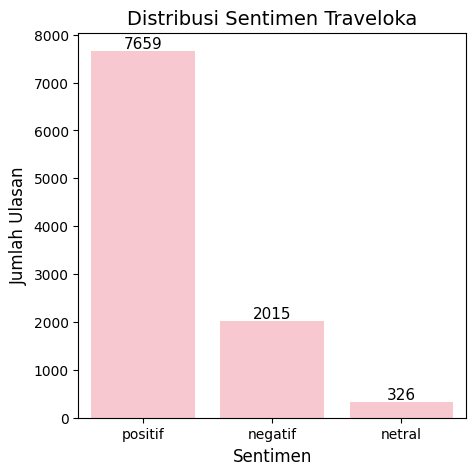

In [16]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5,5))

sns.countplot(x='sentiment', data=df, color='pink')

plt.title("Distribusi Sentimen Traveloka", fontsize=14)
plt.xlabel("Sentimen", fontsize=12)
plt.ylabel("Jumlah Ulasan", fontsize=12)

for p in plt.gca().patches:
    plt.gca().annotate(
        f'{int(p.get_height())}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
        textcoords='offset points'
    )
plt.show()

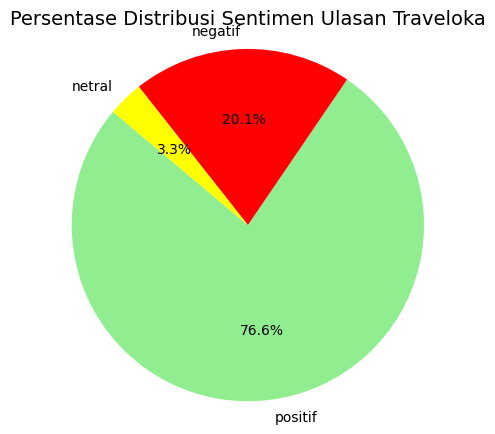

In [23]:
# Visualisasi Pie Chart
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['lightgreen', 'red', 'yellow']
)

plt.title("Persentase Distribusi Sentimen Ulasan Traveloka", fontsize=14)
plt.axis('equal')
plt.show()

**Membuat Word Cloud**

In [24]:
!pip install wordcloud

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
positif_text = " ".join(df[df['sentiment'] == 'positif']['clean_content'].astype(str))
negatif_text = " ".join(df[df['sentiment'] == 'negatif']['clean_content'].astype(str))
netral_text  = " ".join(df[df['sentiment'] == 'netral']['clean_content'].astype(str))

print("Data siap digunakan untuk Word Cloud")

Data siap digunakan untuk Word Cloud


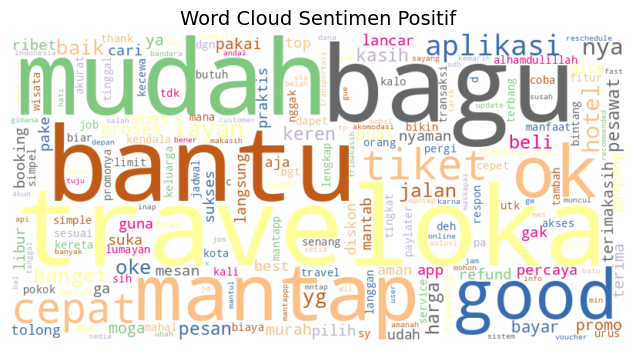

In [27]:
wordcloud_positif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='Accent_r'
).generate(positif_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif", fontsize=14)
plt.show()

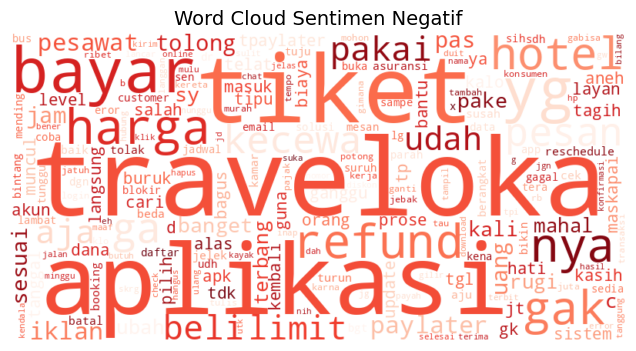

In [28]:
wordcloud_negatif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='Reds'
).generate(negatif_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Negatif", fontsize=14)
plt.show()

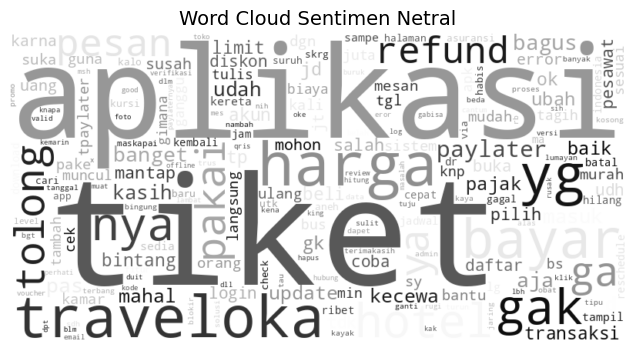

In [29]:
wordcloud_netral = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False,
    colormap='gist_gray'
).generate(netral_text)

plt.figure(figsize=(8,4))
plt.imshow(wordcloud_netral, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Netral", fontsize=14)
plt.show()

**Melakukan Data Splitting**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df['clean_content']
y = df['sentiment']

print("Jumlah total data:", len(X))
print("Contoh teks:", X.iloc[0])
print("Label:", y.iloc[0])

Jumlah total data: 10000
Contoh teks: puas
Label: positif


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Jumlah data latih :", len(X_train))
print("Jumlah data uji   :", len(X_test))

Jumlah data latih : 8000
Jumlah data uji   : 2000


In [33]:
print("Contoh data latih:")
print(X_train.iloc[0], y_train.iloc[0])

print("Contoh data uji:")
print(X_test.iloc[0], y_test.iloc[0])

Contoh data latih:
verifikasi negatif
Contoh data uji:
layan cepat positif


**Melakukan Training Model Logistic Regression 80/20**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
X = df['clean_content']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai. Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai. Bentuk data latih: (8000, 5000)


In [36]:
log_model_80_20 = LogisticRegression(max_iter=1000, random_state=42)

log_model_80_20.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


Akurasi model Logistic Regression: 89.45%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.79      0.78      0.78       403
      netral       0.00      0.00      0.00        65
     positif       0.92      0.96      0.94      1532

    accuracy                           0.89      2000
   macro avg       0.57      0.58      0.57      2000
weighted avg       0.86      0.89      0.88      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


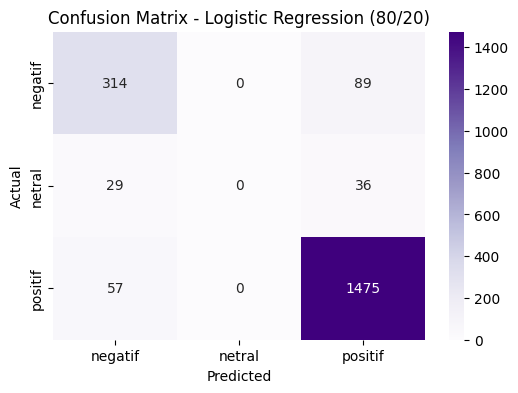

In [37]:
y_pred = log_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Logistic Regression: {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=log_model_80_20.classes_,
            yticklabels=log_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (80/20)")
plt.show()

**Melakukan Training Model Logistic Regression 70/30**

In [38]:
X = df['clean_content']
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai. Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai. Bentuk data latih: (7000, 5000)


In [39]:
log_model_70_30 = LogisticRegression(max_iter=1000, random_state=42)

log_model_70_30.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih.")

Model Logistic Regression berhasil dilatih.


Akurasi model Logistic Regression: 89.83%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.79      0.79      0.79       604
      netral       0.00      0.00      0.00        98
     positif       0.92      0.97      0.94      2298

    accuracy                           0.90      3000
   macro avg       0.57      0.58      0.58      3000
weighted avg       0.87      0.90      0.88      3000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


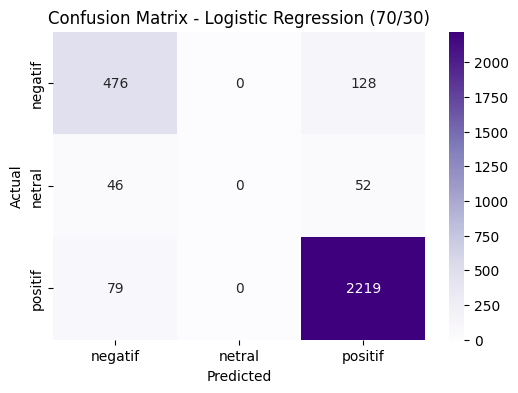

In [40]:
y_pred = log_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model Logistic Regression: {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=log_model_70_30.classes_,
            yticklabels=log_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (70/30)")
plt.show()

**Melakukan Training Model SVM 80/20**

In [41]:
from sklearn.svm import SVC

In [42]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (80/20). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (80/20). Bentuk data latih: (8000, 5000)


In [43]:
svm_model_80_20 = SVC(kernel='linear', random_state=42)
svm_model_80_20.fit(X_train_tfidf, y_train)

print("Model SVM berhasil dilatih (80/20).")

Model SVM berhasil dilatih (80/20).


Akurasi SVM (80/20): 89.65%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.77      0.82      0.79       403
      netral       0.00      0.00      0.00        65
     positif       0.93      0.96      0.94      1532

    accuracy                           0.90      2000
   macro avg       0.57      0.59      0.58      2000
weighted avg       0.87      0.90      0.88      2000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


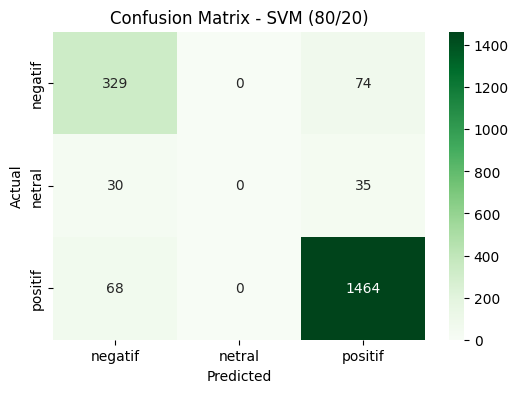

In [44]:
y_pred = svm_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (80/20): {accuracy*100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model_80_20.classes_,
            yticklabels=svm_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (80/20)")
plt.show()

**Melakukan Training Model SVM 70/30**

In [45]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (70/30). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (70/30). Bentuk data latih: (7000, 5000)


In [46]:
svm_model_70_30 = SVC(kernel='linear', random_state=42)
svm_model_70_30.fit(X_train_tfidf, y_train)

print("Model SVM berhasil dilatih (70/30).")

Model SVM berhasil dilatih (70/30).


Akurasi SVM (70/30): 89.37%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.77      0.80      0.78       604
      netral       0.00      0.00      0.00        98
     positif       0.93      0.96      0.94      2298

    accuracy                           0.89      3000
   macro avg       0.56      0.58      0.57      3000
weighted avg       0.86      0.89      0.88      3000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


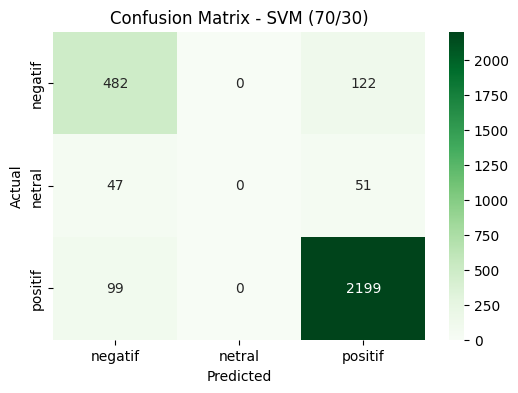

In [47]:
y_pred = svm_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM (70/30): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=svm_model_70_30.classes_,
            yticklabels=svm_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM (70/30)")
plt.show()

**Melakukan Training Model Random Forest 80/20**

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (80/20). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (80/20). Bentuk data latih: (8000, 5000)


In [50]:
rf_model_80_20 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model_80_20.fit(X_train_tfidf, y_train)
print("Model Random Forest berhasil dilatih (80/20).")

Model Random Forest berhasil dilatih (80/20).


Akurasi Random Forest (80/20): 89.10%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.75      0.80      0.78       403
      netral       0.50      0.02      0.03        65
     positif       0.93      0.95      0.94      1532

    accuracy                           0.89      2000
   macro avg       0.73      0.59      0.58      2000
weighted avg       0.88      0.89      0.88      2000



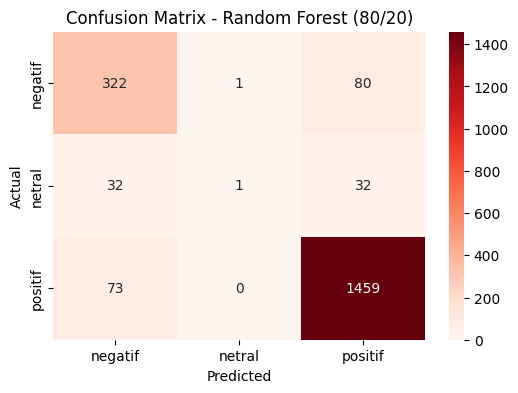

In [51]:
y_pred = rf_model_80_20.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest (80/20): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_model_80_20.classes_,
            yticklabels=rf_model_80_20.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (80/20)")
plt.show()

**Melakukan Training Model Random Forest 70/30**

In [52]:
X = df['clean_content']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF selesai (70/30). Bentuk data latih:", X_train_tfidf.shape)

TF-IDF selesai (70/30). Bentuk data latih: (7000, 5000)


In [53]:
rf_model_70_30 = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model_70_30.fit(X_train_tfidf, y_train)
print("Model Random Forest berhasil dilatih (70/30).")

Model Random Forest berhasil dilatih (70/30).


Akurasi Random Forest (70/30): 88.83%
Classification Report:
              precision    recall  f1-score   support

     negatif       0.76      0.78      0.77       604
      netral       0.20      0.01      0.02        98
     positif       0.92      0.95      0.94      2298

    accuracy                           0.89      3000
   macro avg       0.63      0.58      0.58      3000
weighted avg       0.87      0.89      0.87      3000



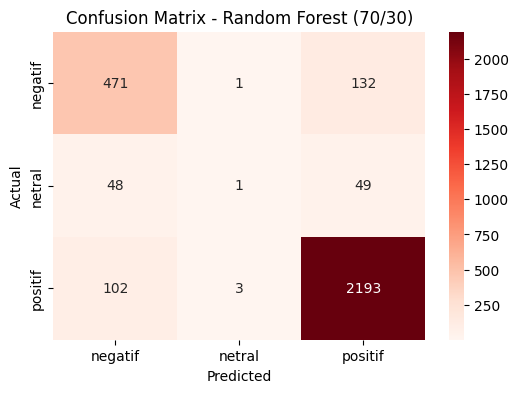

In [54]:
y_pred = rf_model_70_30.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Random Forest (70/30): {accuracy*100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=rf_model_70_30.classes_,
            yticklabels=rf_model_70_30.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest (70/30)")
plt.show()

**Simpan Model**

In [55]:
import joblib
from google.colab import files

joblib.dump(log_model_80_20, 'log_model_80_20.pkl')
joblib.dump(log_model_70_30, 'log_model_70_30.pkl')

joblib.dump(svm_model_80_20, 'svm_model_80_20.pkl')
joblib.dump(svm_model_70_30, 'svm_model_70_30.pkl')

joblib.dump(rf_model_80_20, 'rf_model_80_20.pkl')
joblib.dump(rf_model_70_30, 'rf_model_70_30.pkl')

# Mendowload semua file
files.download('log_model_80_20.pkl')
files.download('log_model_70_30.pkl')
files.download('svm_model_80_20.pkl')
files.download('svm_model_70_30.pkl')
files.download('rf_model_80_20.pkl')
files.download('rf_model_70_30.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [56]:
!pip freeze > requirements.txt
print("File requirements.txt berhasil dibuat.")

File requirements.txt berhasil dibuat.


In [57]:
from google.colab import files
files.download("requirements.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>